# **An Introduction to PROTACs**


### David Zhang and David Figueroa

PROTACs represent an emerging wave of new therapeutics capable of modulating proteins once thought nearly impossible to target. By eliminating rather than merely inhibiting disease-causing proteins, PROTACs address the limitations of existing drug modalities. As PROTACs progress through clinical trials with promising results, there is growing anticipation surrounding their therapeutic potential.

This DeepChem tutorial serves as a starting point for exploring the world of PROTACs and the exciting field of targeted protein degradation. The tutorial is divided into five partitions:
1. Background literature
2. Data extraction
3. Featurization
4. Model deployment
5. References

With that in mind, let's jump into how we can predict efficacy of PROTAC degraders!


## 1. Background literature

Traditional drug modalities, such as small-molecule drugs or monoclonal antibodies, are limited to certain modes of action, like targeting specific receptors or blocking particular pathways. Targeted protein degradation (TPD) represents a promising new approach to modulate proteins that have been traditionally difficult to target. TPD has given rise to major classes of molecules that have emerged as promising therapeutic approaches against various disease contexts.



### 1.1 Targeted protein degradation

Targeted protein degradation represents a way of leveraging the cell's natural degradation mechanisms to target disease causing proteins. Typically, the cell maintains protein homeostasis through clearance by proteasomes or lysosomes. By leveraging these intrinsic cellular mechanisms, TPD methods can target a variety of proteins throughout the cell. This has given rise to a collection of TPD methods aimed at degrading proteins that may play roles across many disease states. One of these major class of molecules is proteolysis-targeting chimera (PROTACs).


### 1.2 How do PROTACs work?

PROTAC molecules are ternary structures consisting of a linker, a ligand to recruit and bind to the target protein, and a ligand to recruit the E3 ubiquitin ligase. Before we dive into how PROTACs mediate this degradation mechanism, it is crucial to understand the underlying biological pathway that makes this all possible.

<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs12943-022-01707-5/MediaObjects/12943_2022_1707_Fig14_HTML.png?as=webp" alt="protac_structures.png" width="700" height="550">

**Figure 1:** Molecular structure of PROTACs molecules designed to inhibit epidermal growth factor receptor (EGFR). The PROTAC linker connects the EGFR ligand and E3 ligase which are highlighted in yellow and gray, respectively [[1]](#1).


#### 1.1.1 Ubiquitin Proteasome System

The ubiquitin proteasome system, or UPS for short, is a crucial cellular maintenance mechanism. Ubiquitin-dependent proteolysis is a three-step process which involves ubiquitin-activating enzymes (E1), ubiquitin-conjugate enzymes (E2), and ubiquitin-protein ligases (E3). In general, E1 activates ubiquitin, priming it for transfer to E2 which interacts with E3 at which point E3 ligases are responsible for binding of the target protein substrate for subsequent ubiquitination by E2. Once the protein is tagged with a polyubiquitin chain, it is recognized by the proteasome, a large protease complex that degrades that protein into peptides.  

![ups.png](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3466981/bin/ijcep0005-0726-f1.jpg)

**Figure 2:** The ubiquitin proteasome system is one of the cell's internal degradation mechanism crucial for targetting dysfunctional proteins. Naturally this opens up opportunities to leverage this in a therapeutic context [[2]](#2).



#### 1.1.2 Connection to PROTACs

The realization that the UPS could be leveraged for therapeutic purposes was initially made through early studies of viruses and plants. The underlying idea involves design of small molecules capable of recruiting the E3 ligase and inducing degradation of a protein of interest (POI). This general idea naturally extended itself to the case of PROTACs. Together, the POI ligand, linker, and E3 ligase ligand make up the PROTAC complex responsible for protein degradation. Note that the presence of two ligands enables simultaneous  recruitment of the E3 ligase and POI, hence its heterobifunctionality property.

Furthermore, after the POI is degraded by the proteasome, PROTACs can disassociate and continue to induce further degradation, enabling low concentrations to be efficacious. This catalytic mechanism of action and event-drive pharmacology prevents PROTACs from suffering the same limitations as conventional therapeutic strategies such as drug resistance and off-target effects.

![protac.png](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41392-019-0101-6/MediaObjects/41392_2019_101_Fig1_HTML.png?as=webp)

**Figure 3:** The mechanism of action of PROTACs center around the UPS. In a heterobifunctional manner, recruiting both a target protein of interest and an E3 ligase, PROTACs are able to promote protein degradation in diseases [[3]](#3).

### 1.3 Molecular Glues

It is worth noting that PROTACs are not the only TPD method. Another major class which which also leverages the UPS to elicit degradation are molecular glues. As implied by its name, molecular glues stabilize protein-protein interactions between the target protein and E3 ligase. Notice how this is different than PROTACs which consists of two separate binding ligands connected by a linker. Consequently, molecular glues may be less sterically hindered without the need for a linker. However, identifying binding sites to induce new protein-protein interactions is typically harder than accomodating for existing ligands, as in the case for PROTACs, making it harder to design molecular glues.


<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0960894X18303585-fx1_lrg.jpg" alt="protac_structures.png" width="750" height="400">


**Figure 4:** Lenalidomide is a molecular glue which mediates the interaction between CRBN, an E3 ligase, and CK1α, resulting in subsequent ubiquitination. [[4]](#4)

### 1.4 How can we leverage machine learning?

As a novel and promising technique, PROTACs have demonstrated positive clinical results thus far. However, much of the clinical validation has been against classically drugged targets. In order for PROTACs to reach their full potential, their clinical efficacy against novel or hard to reach targets must be demonstrated. Consequently, there has been growing research in designing PROTAC molecules capable of elicting an effective response. However, much of the current work is empirical and requires extensive trial-and-error processes. Machine learning could potentially revolutionize this. By correlating molecular structure with physiochemical properties and biological activity, we could potentially streamline the discovery process, significantly reducing the time and cost associated with validation. With that in mind, let's jump into this tutorial to predict efficacy of PROTAC degraders!




For a more in-depth dive into PROTACs, ubiquitin proteasome system, and targeted protein degradation, readers are referred to [[5]](#5) and [[6]](#6).


## 2. Data extraction

Before we proceed, let's install deepchem into our colab environment.


In [10]:
!pip install deepchem

In [11]:
!pip install matplotlib

Now let's download this dataset on PROTACs, curated by [[7]](#7), which includes 3270 PROTACs.

In [12]:
# Python library imports
import os

# DeepChem and scientific library imports
import deepchem as dc
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

# Third-party library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import requests

url = "https://deepchemdata.s3.us-west-1.amazonaws.com/datasets/protac_10_06_24.csv"
file_name = "protac_10_06_24.csv"

response = requests.get(url)
if response.status_code == 200:
    with open(file_name, "wb") as file:
        file.write(response.content)
    print(f"File downloaded successfully: {file_name}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")


File downloaded successfully: protac_10_06_24.csv


In [14]:
import os
print(os.path.exists("protac_10_06_24.csv"))  # Should return True if the file exists


True


In [15]:
import pandas as pd
protac_db = pd.read_csv("protac_10_06_24.csv")
print(protac_db.head())


   Compound ID Uniprot Target E3 ligase  PDB Name  \
0            1  Q9NPI1   BRD7       VHL  NaN  NaN   
1            1  Q9H8M2   BRD9       VHL  NaN  NaN   
2            2  Q9NPI1   BRD7       VHL  NaN  NaN   
3            2  Q9H8M2   BRD9       VHL  NaN  NaN   
4            3  Q9H8M2   BRD9      CRBN  NaN  NaN   

                                              Smiles DC50 (nM) Dmax (%)  \
0  COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...       NaN      NaN   
1  COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...       NaN      NaN   
2  COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...       NaN      NaN   
3  COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...       NaN      NaN   
4  COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...       NaN      NaN   

  Assay (DC50/Dmax)  ... XLogP3 Heavy Atom Count Ring Count  \
0               NaN  ...   3.03               68          7   
1               NaN  ...   3.03               68          7   
2               NaN  ...   2.74          

Note that there exists a many-to-many mapping between PROTAC compounds and target proteins.
A single PROTAC compound can be designed to target multiple proteins, and conversely, multiple PROTAC compounds can be developed to target the same protein.
This many-to-many relationship allows for greater flexibility and adaptability in the design and application of PROTACs.

In [16]:
print('''In this dataset, there are {} unique PROTAC compounds, targeting {} unique proteins for a total of {} combinations'''.format(len(protac_db['Compound ID'].unique()),
                                                                                   len(protac_db['Target'].unique()), protac_db.shape[0]))
protac_db

In this dataset, there are 3270 unique PROTAC compounds, targeting 323 unique proteins for a total of 5388 combinations


,Compound ID,Uniprot,Target,E3 ligase,PDB,Name,Smiles,DC50 (nM),Dmax (%),Assay (DC50/Dmax),...,XLogP3,Heavy Atom Count,Ring Count,Hydrogen Bond Acceptor Count,Hydrogen Bond Donor Count,Rotatable Bond Count,Topological Polar Surface Area,Molecular Formula,InChI,InChI Key
0,1,Q9NPI1,BRD7,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,3.03,68,7,15,3,19,189.92,C50H64N8O9S,InChI=1S/C50H64N8O9S/c1-32-45(68-31-53-32)34-1...,RPMQBLMPGMFXLD-PDUNVWSESA-N
1,1,Q9H8M2,BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,3.03,68,7,15,3,19,189.92,C50H64N8O9S,InChI=1S/C50H64N8O9S/c1-32-45(68-31-53-32)34-1...,RPMQBLMPGMFXLD-PDUNVWSESA-N
2,2,Q9NPI1,BRD7,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,2.74,74,7,17,3,25,208.38,C54H72N8O11S,InChI=1S/C54H72N8O11S/c1-36-49(74-35-57-36)38-...,NGWWVKZONFCNQP-SHPBXJAASA-N
3,2,Q9H8M2,BRD9,VHL,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,2.74,74,7,17,3,25,208.38,C54H72N8O11S,InChI=1S/C54H72N8O11S/c1-36-49(74-35-57-36)38-...,NGWWVKZONFCNQP-SHPBXJAASA-N
4,3,Q9H8M2,BRD9,CRBN,NaN,NaN,COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN...,NaN,NaN,NaN,...,0.70,61,7,15,3,18,202.97,C43H50N8O10,InChI=1S/C43H50N8O10/c1-48-24-31(28-9-10-44-23...,RMBNUDOJPQLHMV-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5383,3266,O60885,BRD4,FEM1B,NaN,NaN,CC1=C(C)C2=C(S1)N1C(C)=NN=C1[C@H](CC(=O)NCCOCC...,1600,80,Degradation of BRD4 in HEK293T cells after 8 h...,...,3.28,64,6,15,2,24,194.76,C44H53Cl2N9O8S,InChI=1S/C44H53Cl2N9O8S/c1-29-30(2)64-44-41(29...,UUCUKSPUFPMKNK-DHUJRADRSA-N
5384,3267,NaN,BCR-ABL,FEM1B,NaN,NaN,CC1=NC(NC2=NC=C(C(=O)NC3=C(C)C=CC=C3Cl)S2)=CC(...,NaN,NaN,NaN,...,5.92,58,6,13,3,17,171.95,C40H47Cl2N11O4S,InChI=1S/C40H47Cl2N11O4S/c1-27-8-6-9-30(42)38(...,WIXPXNLUXBZCHT-UHFFFAOYSA-N
5385,3268,NaN,BCR-ABL,FEM1B,NaN,NaN,CC1=NC(NC2=NC=C(C(=O)NC3=C(C)C=CC=C3Cl)S2)=CC(...,NaN,NaN,NaN,...,4.41,64,6,16,3,23,199.64,C43H53Cl2N11O7S,InChI=1S/C43H53Cl2N11O7S/c1-30-5-3-6-33(45)41(...,YPMQMBLMNGXVCK-UHFFFAOYSA-N
5386,3269,P03372,ER,CRBN,NaN,ARV-471,O=C1CC[C@H](N2CC3=CC(N4CCN(CC5CCN(C6=CC=C([C@@...,2,NaN,Degradation of ER in ER-positive breast cancer...,...,6.36,54,9,7,2,7,96.43,C45H49N5O4,InChI=1S/C45H49N5O4/c51-37-12-15-39-33(27-37)8...,TZZDVPMABRWKIZ-XMOGEVODSA-N


Taking a closer look at the dataset, each PROTAC compound has a SMILEs representation along with its target protein of interest and E3 ligase. For reference, here is an example:

In [17]:
example = protac_db.iloc[0]
print('''Here is the SMILEs representation of a PROTAC compound: {}
designed to target {} protein through ubiquitination by {} E3 ligase.'''.format(example['Smiles'], example['Target'], example['E3 ligase']))

Here is the SMILEs representation of a PROTAC compound: COC1=CC(C2=CN(C)C(=O)C3=CN=CC=C23)=CC(OC)=C1CN1CCN(CCOCCOCC(=O)N[C@H](C(=O)N2C[C@H](O)C[C@H]2C(=O)NCC2=CC=C(C3=C(C)N=CS3)C=C2)C(C)(C)C)CC1
designed to target BRD7 protein through ubiquitination by VHL E3 ligase.


In [18]:
protac_db.columns

Index(['Compound ID', 'Uniprot', 'Target', 'E3 ligase', 'PDB', 'Name',
       'Smiles', 'DC50 (nM)', 'Dmax (%)', 'Assay (DC50/Dmax)',
       'Percent degradation (%)', 'Assay (Percent degradation)',
       'IC50 (nM, Protac to Target)', 'Assay (Protac to Target, IC50)',
       'EC50 (nM, Protac to Target)', 'Assay (Protac to Target, EC50)',
       'Kd (nM, Protac to Target)', 'Assay (Protac to Target, Kd)',
       'Ki (nM, Protac to Target)', 'Assay (Protac to Target, Ki)',
       'delta G (kcal/mol, Protac to Target)',
       'delta H (kcal/mol, Protac to Target)',
       '-T*delta S (kcal/mol, Protac to Target)',
       'Assay (Protac to Target, G/H/-TS)', 'kon (1/Ms, Protac to Target)',
       'koff (1/s, Protac to Target)', 't1/2 (s, Protac to Target)',
       'Assay (Protac to Target, kon/koff/t1/2)', 'IC50 (nM, Protac to E3)',
       'Assay (Protac to E3, IC50)', 'EC50 (nM, Protac to E3)',
       'Assay (Protac to E3, EC50)', 'Kd (nM, Protac to E3)',
       'Assay (Protac to E3, 

In general, the PROTAC-DB dataset contains information for a variety of different physiochemical and biochemical properties of PROTAC structures. Several useful ones to point out are $ΔG$, which describes the spontaneity of a chemical reaction, $K_d$ which measures the concentration of a ligand to achieve 50% occupancy of the protein binding sites, and $XLogP3$ which measures a compound's solubility, an indication of its absorption and distribution characteristics.

Before we proceed, let's plot the distribution of each of these properties to get a better sense of our PROTAC dataset starting with ΔG values.

[]

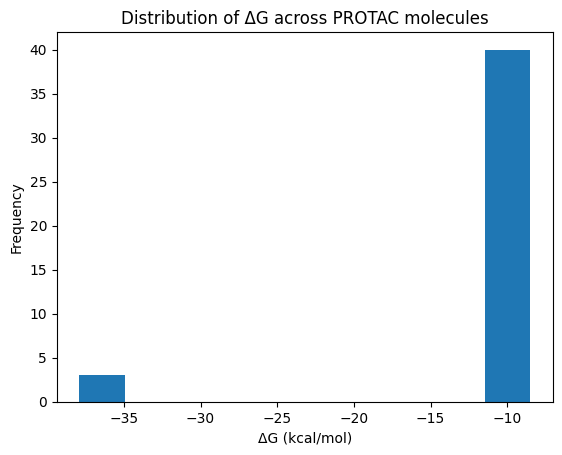

In [19]:
delta_G = protac_db['delta G (kcal/mol, Protac to E3)']
delta_G = delta_G.dropna()
delta_G = delta_G.astype(float)
plt.hist(delta_G, bins=10)
plt.xlabel('ΔG (kcal/mol)')
plt.ylabel('Frequency')
plt.title(f'Distribution of ΔG across PROTAC molecules')
plt.plot()

Let's take a closer look at the distribution of PROTAC molecules around the -10 range of ΔG values.

[]

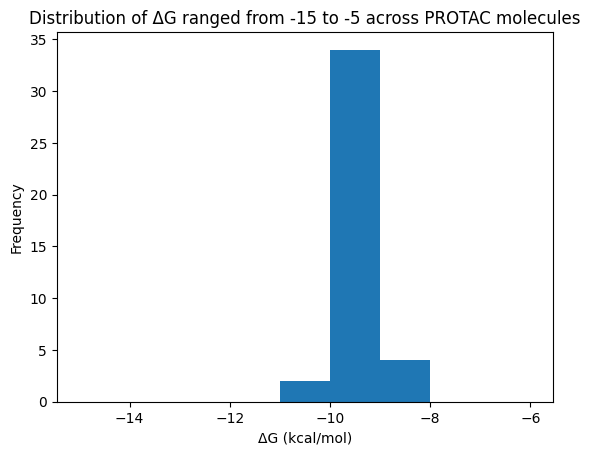

In [20]:
delta_G = protac_db['delta G (kcal/mol, Protac to E3)']
delta_G = delta_G.dropna()
delta_G = delta_G.astype(float)

x_min = -15
x_max = -5
bin_size = 1
bins = np.arange(x_min, x_max, bin_size)

plt.hist(delta_G, bins=bins)
plt.xlabel('ΔG (kcal/mol)')
plt.ylabel('Frequency')
plt.title('Distribution of ΔG ranged from -15 to -5 across PROTAC molecules')
plt.plot()

There does not appear to be a lot of information on the spontaneity of PROTAC reactions but it is worth noting that the ones with recorded ΔGs appear energetically favorable, as expected.

Let's now take a look at the $K_d$ values.

[]

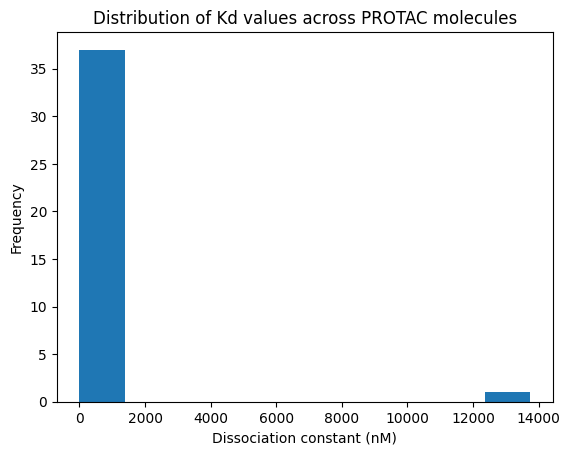

In [21]:
kd_data = protac_db['Kd (nM, Ternary complex)']
kd_data = kd_data.dropna()
kd_data = kd_data[~kd_data.str.contains('/')]
kd_data = kd_data.astype(float)
plt.hist(kd_data)
plt.xlabel('Dissociation constant (nM)')
plt.ylabel('Frequency')
plt.title('Distribution of Kd values across PROTAC molecules')
plt.plot()

Similar to ΔG values, there does not appear to be a lot of information on the affinity of formed PROTAC complexes. Since the range is so large, let's plot a second histogram focused on the PROTACs with low $K_d$.

[]

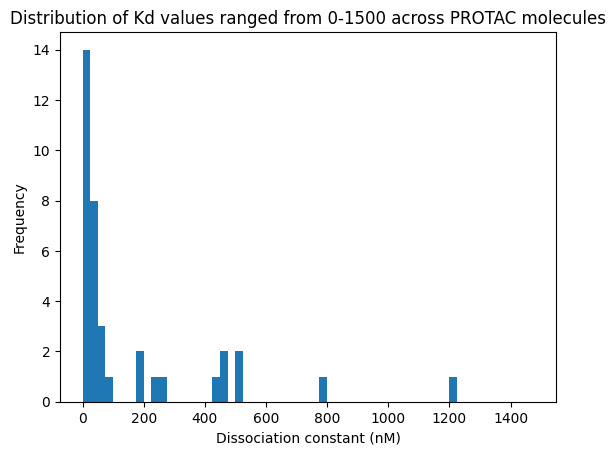

In [22]:
kd_data = protac_db['Kd (nM, Ternary complex)']
kd_data = kd_data.dropna()
kd_data = kd_data[~kd_data.str.contains('/')]
kd_data = kd_data.astype(float)

# limit range
x_max = 1500
x_min = 0
bin_size = 25
bins = np.arange(x_min, x_max, bin_size)

plt.hist(kd_data, bins=bins)

plt.xlabel('Dissociation constant (nM)')
plt.ylabel('Frequency')
plt.title('Distribution of Kd values ranged from 0-1500 across PROTAC molecules')
plt.plot()

The improved resolution of values illustrates a much cleaner distribution of $K_d$ values. We do see that a number of them have low, favorable $K_d$ values indicating that the PROTAC linker can form a strong connection with the E3 ligase and target protein.

Let's now take a look at XLogP3 values. Note that this is slightly different than the typical LogP partition coefficient. Recall that LogP is defined $$LogP = log(\frac{[solute]_{oct}}{[solute]_{H_2O}})$$

In other words, LogP is the measured ratio of the concentration of a compound in the organic phase to the its concentration in the aqueous phase, measuring the compound's solubility. XLogP3 is a knowledge-based method for calculating the partition coefficient by accounting for the molecular structure, presence of functional groups, and bonding [[8]](#8). Both properties estimate a compound's liphophilicity, giving insight into how a compound may behave in biological systems.

[]

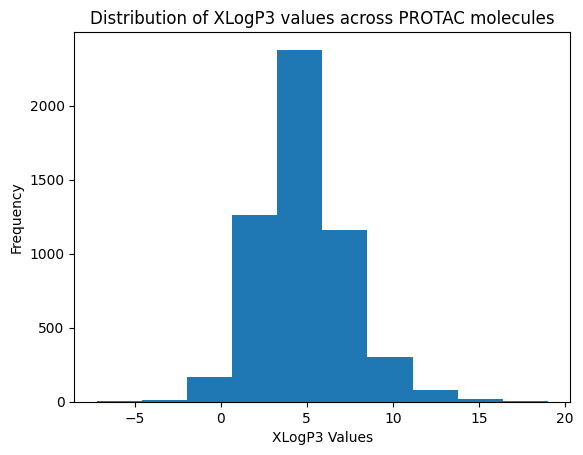

In [23]:
plt.hist(protac_db['XLogP3'])
plt.xlabel('XLogP3 Values')
plt.ylabel('Frequency')
plt.title('Distribution of XLogP3 values across PROTAC molecules')
plt.plot()

All PROTAC compounds have a recorded XLogP3 value. The distribution looks normally distributed with few molecules with extreme logP profiles.  

Now, let's take a look at the PROTAC degradation properties. "DC50 (nM)" and "Dmax (%)"  represent the half maximal degradation concentration and maximal degradation of the target protein of interest, respectively. Let's take a quick look at their distributions.

Let's first do some data cleaning

In [24]:
# Let's first drop all the NaN values
raw_dc50 = protac_db['DC50 (nM)']
raw_dc50 = raw_dc50.dropna()

Notice that the values are all in string format with non-numerical characters such as '<', '/', and '>'. For the time being, let's remove these values.

In [25]:
raw_dc50 = raw_dc50[~raw_dc50.str.contains('<|>|/|~|-')]
raw_dc50 = raw_dc50.astype(float)

[]

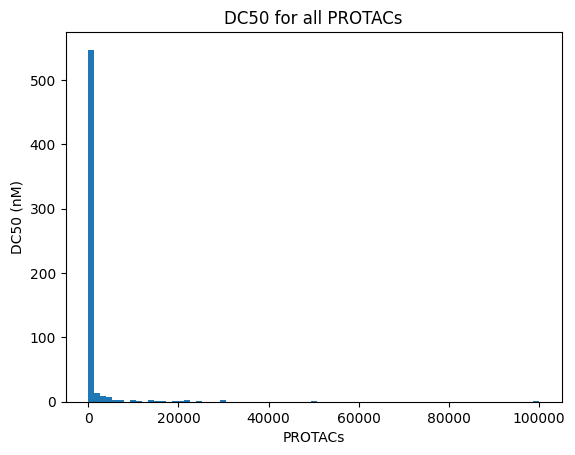

In [26]:
plt.hist(raw_dc50.values, bins=75)
plt.xlabel('PROTACs')
plt.ylabel('DC50 (nM)')
plt.title('DC50 for all PROTACs')
plt.plot()

The distribution is certainly skewed and has a few outliers. Let's log normalize.

In [27]:
lognorm_dc50 = np.log(raw_dc50)

[]

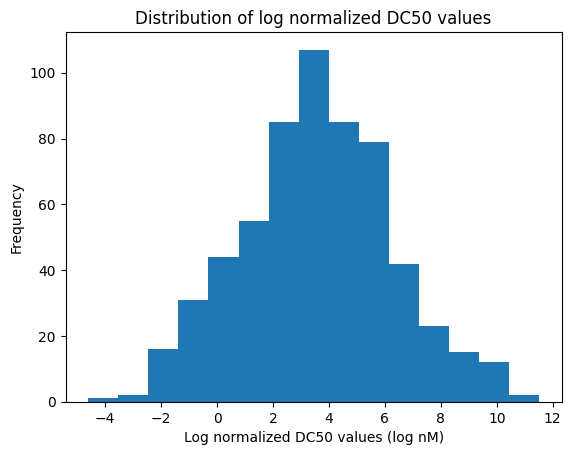

In [28]:
plt.hist(lognorm_dc50, bins=15)
plt.xlabel('Log normalized DC50 values (log nM)')
plt.ylabel('Frequency')
plt.title('Distribution of log normalized DC50 values')
plt.plot()

Now, let's take a look at Dmax percentage which represents the maximal degradation a PROTAC can elicit relative to the total activity of the target protein of interest [[7]](#7).

In [29]:
# Using the same row indices as our cleaned DC50 data
dmax = protac_db.iloc[lognorm_dc50.index]['Dmax (%)']

In [30]:
# Following the same data cleaning procedure:
dmax = dmax.dropna()
dmax = dmax[~dmax.str.contains('<|>|/|~|-')]
dmax = dmax.astype(float)

[]

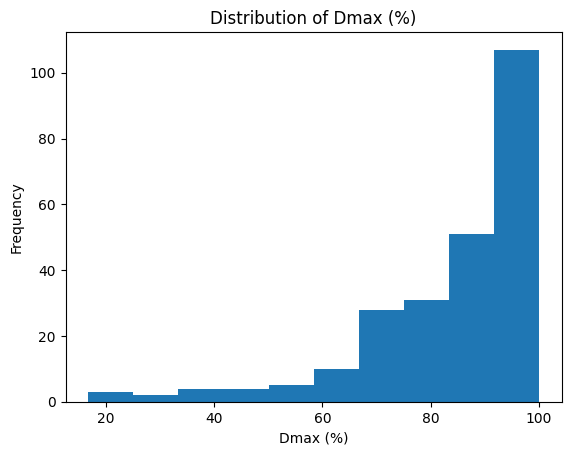

In [31]:
plt.hist(dmax.values, bins=10)
plt.xlabel('Dmax (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Dmax (%)')
plt.plot()

Notice that Dmax is represented as a percentage. For now, let's continue with regressing on DC50. We are now ready to featurize!

In [32]:
# Let's predict DC50 properties for the time being
cleaned_data = protac_db.iloc[lognorm_dc50.index]
print('There are {} PROTAC samples.'.format(cleaned_data.shape[0]))

There are 599 PROTAC samples.


In [33]:
protac_smiles = cleaned_data['Smiles']
dc_vals = lognorm_dc50

## 3. Featurization

Let's featurize using CircularFingerprint which is incorporated in DeepChem! CircularFingerprint is a common featurizer for molecules that encode local information about each atom and their neighborhood. For more information, the reader is refered to [[9]](#9).

In [34]:
from rdkit import Chem
import deepchem as dc

# Use MolGraphConvFeaturizer instead of CircularFingerprint
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)


In [35]:
features = featurizer.featurize(protac_smiles)

In [36]:
# Let's initialize our dataset and perform splits
dataset = dc.data.NumpyDataset(X = features, y = dc_vals, ids=list(protac_smiles))

In [37]:
splitter = dc.splits.RandomSplitter()
train_random, val_random, test_random = splitter.train_valid_test_split(dataset, seed=42)

Along with a random split, let's also use a scaffold split which ensures that the split contain a structurally diverse array of compounds. Scaffold split groups molecules according to presence of rings, linkers, combinations of rings and linkers, as well as atomic properties. In general, scaffold splits are a good way of ensuring generalizability of our models.

In [38]:
# Scaffold split
splitter = dc.splits.ScaffoldSplitter()
train_scaffold, val_scaffold, test_scaffold = splitter.train_valid_test_split(dataset, seed=42)

To see the scaffold split in action, let's visualize the chosen compounds across the splits.

Three molecules from the train set:


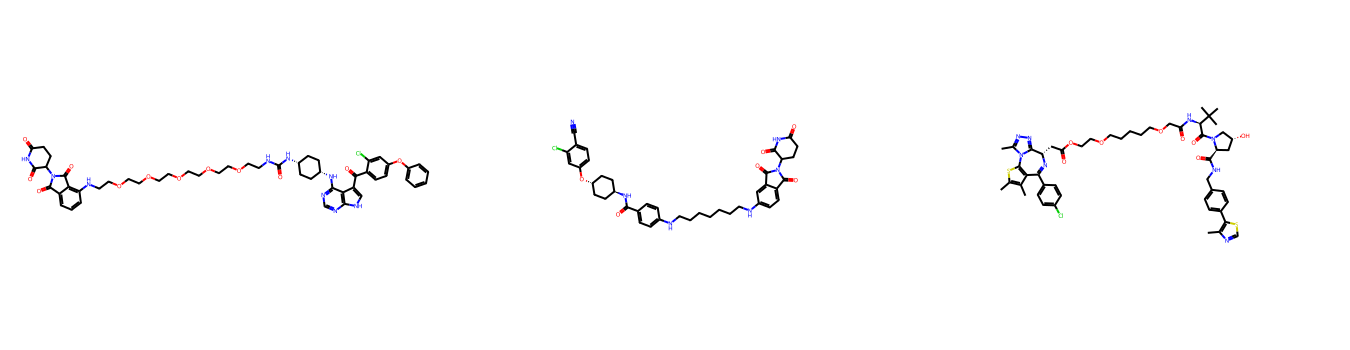

In [39]:
print("Three molecules from the train set:")
np.random.seed(42)
indices = np.random.choice(len(train_scaffold), size=3, replace=False)

smiles = [train_scaffold.ids[index] for index in indices]
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(450, 350))

Three molecules from the validation set:


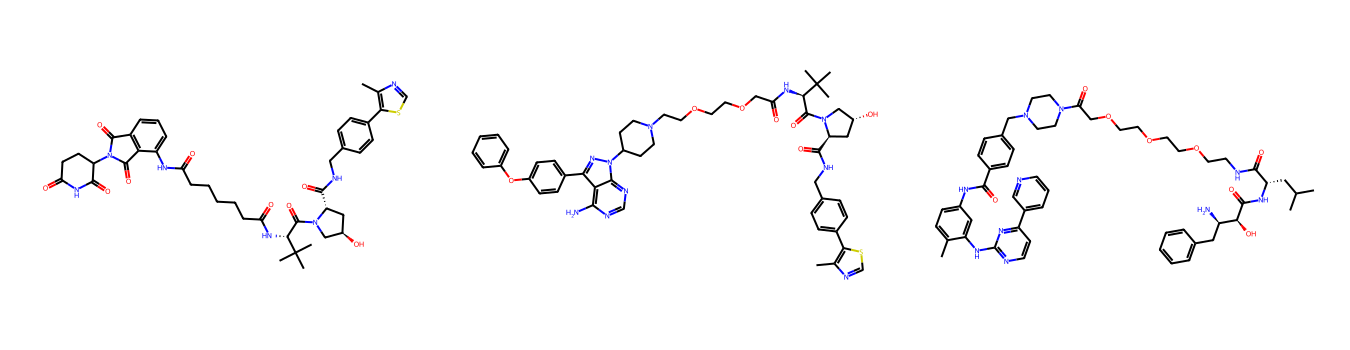

In [40]:
print("Three molecules from the validation set:")
indices = np.random.choice(len(val_scaffold), size=3, replace=False)

smiles = [val_scaffold.ids[index] for index in indices]
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(450, 350))

Five molecules from the test set:


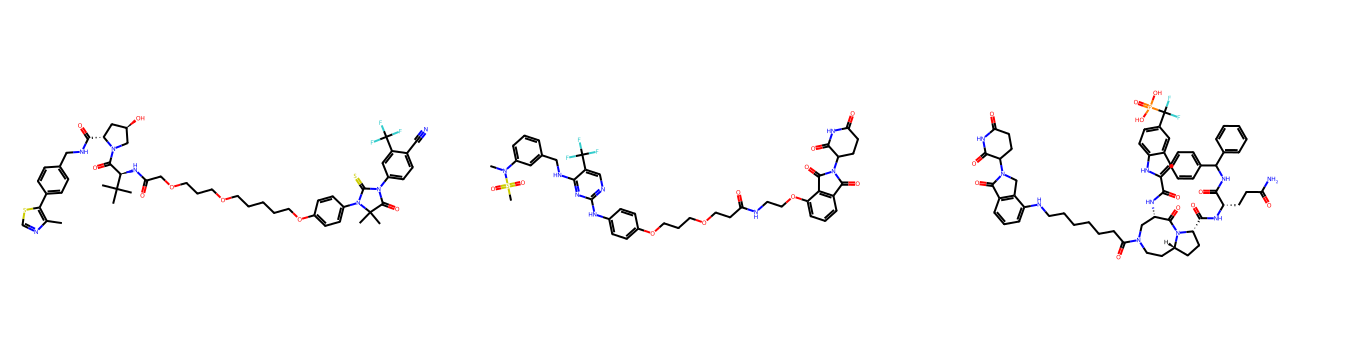

In [41]:
print("Five molecules from the test set:")
indices = np.random.choice(len(test_scaffold), size=3, replace=False)

smiles = [test_scaffold.ids[index] for index in indices]
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(450, 350))

There are certainly functional group differences spread throughout the splits. Notice the presence of the nitrile group in the train set, amine group in the validation set, as well as the sulfonamide group in the test set.

Additionally, notice the structural and conformational differences among the various data splits. It will be interesting to see how well our model generalizes.

## 4. Model deployment

We have successfully generated our train and test datasets. Let's now create a simple MLP model to predict PROTAC degradation properties!

In [42]:
!pip install dgl -f https://data.dgl.ai/wheels/repo.html


Looking in links: https://data.dgl.ai/wheels/repo.html


In [43]:
import deepchem as dc

# Define model parameters
n_tasks = 1
batch_size = 5
learning_rate = 0.001
dropout = 0.2

log_freq = int(len(train_random) / batch_size +1)

protac_model = dc.models.GATModel(
    n_tasks=n_tasks,
    mode="regression",
    batch_size=batch_size,
    learning_rate=learning_rate,
    dropout=dropout
)


# Initialize GAT model
protac_model_random = dc.models.GATModel(
    
    n_tasks=n_tasks,
    mode="regression",
    batch_size=batch_size,
    learning_rate=learning_rate,
    dropout=dropout
)

protac_model_scaffold = dc.models.GATModel(
    n_tasks=n_tasks,
    mode="regression",
    batch_size=batch_size,
    learning_rate=learning_rate,
    dropout=dropout
)

ImportError: This class requires dgl.

Let's now wrap everything together to instantiate a DeepChem model! Note that due to the small sample size, a smaller batch size actually helps performance.

In [ ]:
!pip install dgl

  Using cached torchdata-0.11.0-py3-none-any.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.3 MB 16.7 MB/s eta 0:00:01
   ----------------------- ---------------- 3.1/5.3 MB 8.0 MB/s eta 0:00:01
   ----------------------- ---------------- 3.1/5.3 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 6.9 MB/s eta 0:00:00
Using cached torchdata-0.11.0-py3-none-any.whl (61 kB)


In [ ]:
# protac_model = dc.models.torch_models.TorchModel(protac_model, loss=criterion, optimizer=optimizer, batch_size=10, log_frequency=log_freq)
param_count = sum(p.numel() for p in protac_model_random.model.parameters() if p.requires_grad)
print("There are {} trainable parameters".format(param_count))
protac_model_random.model

There are 532805 trainable parameters


PytorchImpl(
  (layers): ModuleList(
    (0): Linear(in_features=2048, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
  (output_layer): Linear(in_features=1, out_features=1, bias=True)
  (uncertainty_layer): Linear(in_features=1, out_features=1, bias=True)
)

Let's define the validation function to prevent overfitting.

In [ ]:
train_losses_random = []
val_losses_random = []

train_losses_scaffold = []
val_losses_scaffold = []

metric = [dc.metrics.Metric(dc.metrics.mean_squared_error)]

n_epochs=100
for i in range(n_epochs):
  protac_model_random.fit(train_random, nb_epoch=1, all_losses=train_losses_random)

  protac_model_scaffold.fit(train_scaffold, nb_epoch=1, all_losses=train_losses_scaffold)

  # Validate on every other epoch
  if i % 2 == 0:
    loss = protac_model_random.evaluate(val_random, metrics=metric)
    val_losses_random.append(loss['mean_squared_error'])

    loss = protac_model_scaffold.evaluate(val_scaffold, metrics=metric)
    val_losses_scaffold.append(loss['mean_squared_error'])

We can easily look at how the training went through plotting the recorded losses.

[]

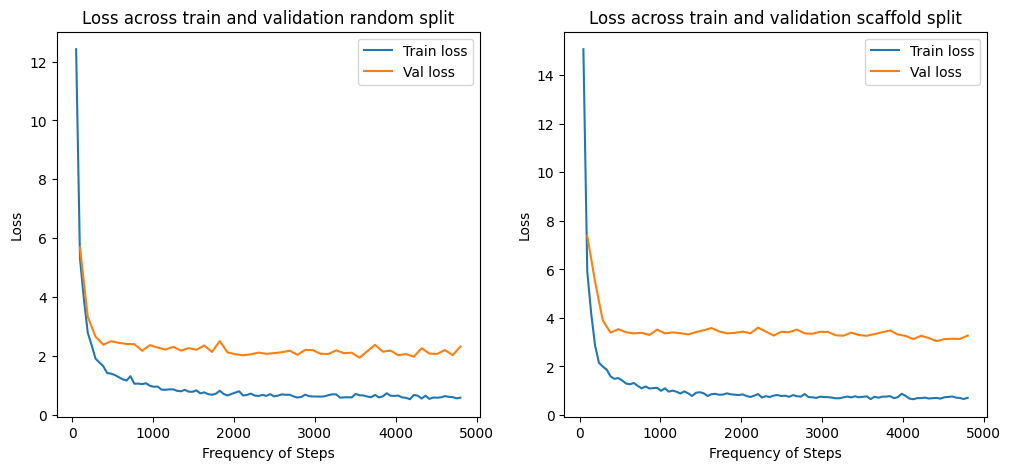

In [ ]:
train_steps = [(i+1)*log_freq for i in range(len(train_losses_random))]
val_steps = [(i+1)*(log_freq*2) for i in range(len(val_losses_random))]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(train_steps, train_losses_random, label='Train loss')
ax[0].plot(val_steps, val_losses_random, label='Val loss')
ax[0].legend()
ax[0].set_xlabel('Frequency of Steps')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss across train and validation random split')

ax[1].plot(train_steps, train_losses_scaffold, label='Train loss')
ax[1].plot(val_steps, val_losses_scaffold, label='Val loss')
ax[1].legend()
ax[1].set_xlabel('Frequency of Steps')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss across train and validation scaffold split')

plt.plot()

We can see that the model performs less well on the scaffold validation set which makes sense as the scaffold splits ensures that more validation molecules are out of distribution relative to the train distribution.

Let's now perform some inference on our test set to evaluate our models!

In [ ]:
metrics = [dc.metrics.Metric(dc.metrics.mean_squared_error), dc.metrics.Metric(dc.metrics.pearsonr), dc.metrics.Metric(dc.metrics.pearson_r2_score)]
eval_metrics = protac_model_random.evaluate(test_random, metrics)
preds = protac_model_random.predict(test_random)

In [ ]:
for k, v in eval_metrics.items():
  print('{}: {}'.format(k, v))

mean_squared_error: 3.074001339280645
pearsonr: 0.818568671566446
pearson_r2_score: 0.6700546700700561


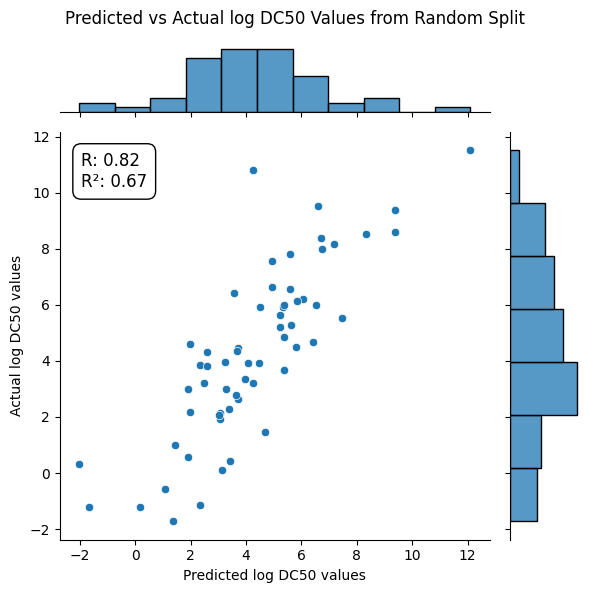

In [ ]:
import seaborn as sns
preds_and_labels = np.concatenate((test_random.y.reshape([60, 1]), preds.reshape([60, 1])), axis=1)
pred_df = pd.DataFrame(preds_and_labels, columns=['Actual log DC50 values', 'Predicted log DC50 values'])
sns.jointplot(pred_df, x='Predicted log DC50 values', y='Actual log DC50 values')
plt.annotate(f"R: {eval_metrics['pearsonr']:.2f}\nR²: {eval_metrics['pearson_r2_score']:.2f}",
             xy=(0.05, 0.95),
             xycoords='axes fraction',
             ha='left',
             va='top',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
# Set the title
plt.suptitle('Predicted vs Actual log DC50 Values from Random Split')

# Adjust the position of the title to avoid overlap with the plot
plt.tight_layout()
plt.show()

The random split appears to do fairly well. Let's see how well our model does on the scaffold split.

In [ ]:
metrics = [dc.metrics.Metric(dc.metrics.mean_squared_error), dc.metrics.Metric(dc.metrics.pearsonr), dc.metrics.Metric(dc.metrics.pearson_r2_score)]
eval_metrics = protac_model_scaffold.evaluate(test_scaffold, metrics)
preds = protac_model_scaffold.predict(test_scaffold)

In [ ]:
for k, v in eval_metrics.items():
  print('{}: {}'.format(k, v))

mean_squared_error: 5.991774828135091
pearsonr: -0.10286796793151554
pearson_r2_score: 0.010581818826359309


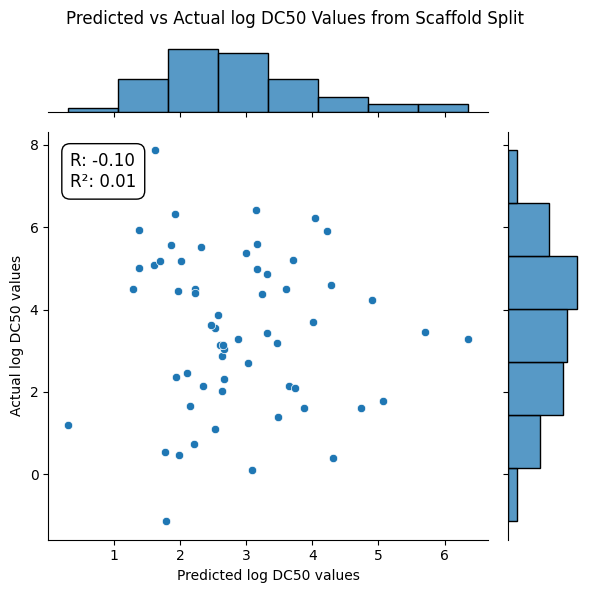

In [ ]:
import seaborn as sns
preds_and_labels = np.concatenate((test_scaffold.y.reshape([60, 1]), preds.reshape([60, 1])), axis=1)
pred_df = pd.DataFrame(preds_and_labels, columns=['Actual log DC50 values', 'Predicted log DC50 values'])
sns.jointplot(pred_df, x='Predicted log DC50 values', y='Actual log DC50 values')
plt.annotate(f"R: {eval_metrics['pearsonr']:.2f}\nR²: {eval_metrics['pearson_r2_score']:.2f}",
             xy=(0.05, 0.95),
             xycoords='axes fraction',
             ha='left',
             va='top',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
# Set the title
plt.suptitle('Predicted vs Actual log DC50 Values from Scaffold Split')

# Adjust the position of the title to avoid overlap with the plot
plt.tight_layout()
plt.show()

The model does significantly worse on the held out scaffold test set which was expected given the simplicity of the model. Developing far more complex models which can generalize out of distribution is a key area of focus in many areas of research from molecule property prediction to computer vision to natural language processing. In general, I hope this tutorial was a informative introduction into the world of PROTACs. Follow along as we explore how we can think about PROTAC design in the next tutorial!


## 5. References

<a name="1"></a> [1] Kelm, J.M., Pandey, D.S., Malin, E. et al. PROTAC’ing oncoproteins: targeted protein degradation for cancer therapy. Mol Cancer. 2023, 22, 62. https://doi.org/10.1186/s12943-022-01707-5

<a name="2"></a> [2] Tu, Y., Chen, C., Pan, J., Xu, J., Zhou, Z. G., & Wang, C. Y. The Ubiquitin Proteasome Pathway (UPP) in the regulation of cell cycle control and DNA damage repair and its implication in tumorigenesis. International journal of clinical and experimental pathology. 2012, 5, 8.

<a name="3"></a> [3] Sun, X., Gao, H., Yang, Y. et al. PROTACs: great opportunities for academia and industry. Sig Transduct Target Ther. 2019, 4, 64. https://doi.org/10.1038/s41392-019-0101-6

<a name="4"></a> [4] Che Y, Gilbert AM, Shanmugasundaram V, Noe MC. Inducing protein-protein interactions with molecular glues. Bioorg Med Chem Lett. 2018, 28, 15. https://doi.org/10.1016/j.bmcl.2018.04.046.

<a name="5"></a> [5] Békés, M., Langley, D.R. & Crews, C.M. PROTAC targeted protein degraders: the past is prologue. Nat Rev Drug Discov. 2022, 21, 181–200. https://doi.org/10.1038/s41573-021-00371-6

<a name="6"></a> [6] Liu, Z., Hu, M., Yang, Y. et al. An overview of PROTACs: a promising drug discovery paradigm. Mol Biomed. 2022, 3 (46). https://doi.org/10.1186/s43556-022-00112-0

<a name="7"></a> [7] Gaoqi Weng, Xuanyan Cai, Dongsheng Cao, Hongyan Du, Chao Shen, Yafeng Deng, Qiaojun He, Bo Yang, Dan Li, Tingjun Hou, PROTAC-DB 2.0: an updated database of PROTACs, Nucleic Acids Research. 2023, 51 (D1), Pages D1367–D1372, https://doi.org/10.1093/nar/gkac946

<a name="8"></a> [8] Cheng T, Zhao Y, Li X, Lin F, Xu Y, Zhang X, Li Y, Wang R, Lai L. Computation of octanol-water partition coefficients by guiding an additive model with knowledge. J Chem Inf Model. 2007, 47 (6), 2140-8. https://doi.org/10.1021/ci700257y.


<a name="9"></a> [9] Glem RC, Bender A, Arnby CH, Carlsson L, Boyer S, Smith J. Circular fingerprints: flexible molecular descriptors with applications from physical chemistry to ADME. IDrugs. 2006, 9 (3).



# **Congratulations! Time to join the Community!**

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:



## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)

This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Discord

The DeepChem [Discord](https://discord.gg/7yKPrJjR3T) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!